## Setup

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
from plotly import express as xp
from plotly import graph_objects as go

### Pandas Options

In [2]:
# Suppress the "SettingWithCopy" warnings.
pd.options.mode.chained_assignment = None

### Plotly Theming

In [3]:
def _spacify(components, attribute):
    """
    Add spaces to the specified attribute of the `Figure` components.
    """
    for component in components:
        try:
            component[attribute] = component[attribute].replace("=", " = ")
        except:
            pass

In [4]:
def _prettify(figure):
    """
    Prettify the `Figure`.
    """
    _spacify(figure["data"], "hovertemplate")
    
    for frame in figure["frames"]:
        _spacify(frame["data"], "hovertemplate")
    
    for slider in figure["layout"]["sliders"]:
        _spacify([slider["currentvalue"]], "prefix")
    
    figure.update_layout(font={"family": "sans", 
                               "size": 14}, 
                         hoverlabel={"bordercolor": "white", 
                                     "font": {"color": "white", 
                                              "family": "sans", 
                                              "size": 12}}, 
                         title={"font": {"size": 20}},
                         template="plotly_white", 
                         width=600,
                         height=400)
    figure.update_traces(opacity=0.6)
    figure.update_xaxes(ticks="outside", 
                        tickcolor="white", 
                        ticklen=10)
    figure.update_yaxes(ticks="outside", 
                        tickcolor="white", 
                        ticklen=10)
    return figure

In [5]:
def _print(figure):
    """
    Print the `Figure` object as a dictionary.
    """
    print(figure)

In [6]:
def _render(figure, show_widgets=False):
    """
    Display the `Figure`.
    """
    figure.show(config={"displayModeBar": show_widgets})

In [7]:
#  Monkey patch the graph_objects `Figure` class to add custom methods.
go.Figure.prettify = _prettify
go.Figure.print = _print
go.Figure.render = _render

## Data

In [8]:
test = pd.read_csv("../data/test.csv")
train = pd.read_csv("../data/train.csv")
spray = pd.read_csv("../data/spray.csv")
weather = pd.read_csv("../data/weather.csv")

In [9]:
print("   Test :", test.shape)
print("  Train :", train.shape)
print("  Spray :", spray.shape)
print("Weather :", weather.shape)

   Test : (116293, 11)
  Train : (10506, 12)
  Spray : (14835, 4)
Weather : (2944, 22)


### Test Traps

In [10]:
test.head()

Id        Date                                            Address  \
0   1  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1   2  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2   3  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
3   4  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
4   5  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2           CULEX PIPIENS     41   N OAK PARK AVE  T002   
3        CULEX SALINARIUS     41   N OAK PARK AVE  T002   
4         CULEX TERRITANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9  
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9  
2  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9  
3  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9  
4  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9

In [11]:
# Drop unnecessary columns.
test.drop(columns=["Address", "Block", "Street", "AddressNumberAndStreet", "AddressAccuracy"], inplace=True)

# Convert the `Date` column to a datetime object.
test["Date"] = pd.to_datetime(test["Date"])

In [12]:
test.head()

Id       Date                 Species  Trap  Latitude  Longitude
0   1 2008-06-11  CULEX PIPIENS/RESTUANS  T002  41.95469 -87.800991
1   2 2008-06-11          CULEX RESTUANS  T002  41.95469 -87.800991
2   3 2008-06-11           CULEX PIPIENS  T002  41.95469 -87.800991
3   4 2008-06-11        CULEX SALINARIUS  T002  41.95469 -87.800991
4   5 2008-06-11         CULEX TERRITANS  T002  41.95469 -87.800991

In [13]:
test.dtypes

Id                    int64
Date         datetime64[ns]
Species              object
Trap                 object
Latitude            float64
Longitude           float64
dtype: object

In [14]:
test.isna().sum()

Id           0
Date         0
Species      0
Trap         0
Latitude     0
Longitude    0
dtype: int64

In [15]:
test.shape

(116293, 6)

### Train Traps

In [16]:
train.head()

Date                                            Address  \
0  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2  2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   NumMosquitos  WnvPresent  
0             1           0  
1             1           0  
2             1           0  
3             1           0  
4             4           0

In [17]:
# There are duplicated rows in our `train` data.
train.duplicated(subset=train.drop(columns=["NumMosquitos", "WnvPresent"]).columns).sum()

2031

In [18]:
# Remove duplicated rows, keeping only the rows with maximum values.
train = train.groupby(train.drop(columns=["NumMosquitos", "WnvPresent"]).columns.to_list()).max().reset_index()

In [19]:
train.head()

Date                                           Address  \
0  2007-05-29       1100 Roosevelt Road, Chicago, IL 60608, USA   
1  2007-05-29       1100 Roosevelt Road, Chicago, IL 60608, USA   
2  2007-05-29  1100 South Peoria Street, Chicago, IL 60608, USA   
3  2007-05-29  1100 West Chicago Avenue, Chicago, IL 60642, USA   
4  2007-05-29    1500 North Long Avenue, Chicago, IL 60651, USA   

                  Species  Block        Street  Trap  \
0  CULEX PIPIENS/RESTUANS     11   W ROOSEVELT  T048   
1          CULEX RESTUANS     11   W ROOSEVELT  T048   
2          CULEX RESTUANS     11   S PEORIA ST  T091   
3          CULEX RESTUANS     11     W CHICAGO  T049   
4          CULEX RESTUANS     15    N LONG AVE  T153   

           AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  1100  W ROOSEVELT, Chicago, IL  41.867108 -87.654224                8   
1  1100  W ROOSEVELT, Chicago, IL  41.867108 -87.654224                8   
2  1100  S PEORIA ST, Chicago, IL  41.862292 -87.648860                8   
3    1100  W CHICAGO, Chicago, IL  41.896282 -87.655232                8   
4   1500  N LONG AVE, Chicago, IL  41.907645 -87.760886                8   

   NumMosquitos  WnvPresent  
0             1           0  
1             2           0  
2             1           0  
3             1           0  
4             1           0

In [20]:
train.shape

(8475, 12)

In [21]:
# Drop unneccessary columns.
train.drop(columns=["Address", "Block", "Street", "AddressNumberAndStreet", "AddressAccuracy"], inplace=True)

# Convert the `Date` column to a datetime object.
train["Date"] = pd.to_datetime(train["Date"])

In [22]:
train.head()

Date                 Species  Trap   Latitude  Longitude  \
0 2007-05-29  CULEX PIPIENS/RESTUANS  T048  41.867108 -87.654224   
1 2007-05-29          CULEX RESTUANS  T048  41.867108 -87.654224   
2 2007-05-29          CULEX RESTUANS  T091  41.862292 -87.648860   
3 2007-05-29          CULEX RESTUANS  T049  41.896282 -87.655232   
4 2007-05-29          CULEX RESTUANS  T153  41.907645 -87.760886   

   NumMosquitos  WnvPresent  
0             1           0  
1             2           0  
2             1           0  
3             1           0  
4             1           0

In [23]:
train.dtypes

Date            datetime64[ns]
Species                 object
Trap                    object
Latitude               float64
Longitude              float64
NumMosquitos             int64
WnvPresent               int64
dtype: object

In [24]:
train.isna().sum()

Date            0
Species         0
Trap            0
Latitude        0
Longitude       0
NumMosquitos    0
WnvPresent      0
dtype: int64

In [25]:
train.shape

(8475, 7)

### Spray Areas

In [26]:
spray.head()

Date        Time   Latitude  Longitude
0  2011-08-29  6:56:58 PM  42.391623 -88.089163
1  2011-08-29  6:57:08 PM  42.391348 -88.089163
2  2011-08-29  6:57:18 PM  42.391022 -88.089157
3  2011-08-29  6:57:28 PM  42.390637 -88.089158
4  2011-08-29  6:57:38 PM  42.390410 -88.088858

In [27]:
# Drop duplicated rows, if any.
spray.drop_duplicates(inplace=True)

In [28]:
# Drop unnecessary columns.
spray.drop(columns="Time", inplace=True)

# Convert the `Date` column to a datetime object.
spray["Date"] = pd.to_datetime(spray["Date"])

In [29]:
spray.head()

Date   Latitude  Longitude
0 2011-08-29  42.391623 -88.089163
1 2011-08-29  42.391348 -88.089163
2 2011-08-29  42.391022 -88.089157
3 2011-08-29  42.390637 -88.089158
4 2011-08-29  42.390410 -88.088858

In [30]:
spray.dtypes

Date         datetime64[ns]
Latitude            float64
Longitude           float64
dtype: object

In [31]:
spray.isna().sum()

Date         0
Latitude     0
Longitude    0
dtype: int64

In [32]:
spray.shape

(14294, 3)

### Weather

In [33]:
weather.head()

Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1  2007-05-01    83    50   67     14        51      56    0    2   
1        2  2007-05-01    84    52   68      M        51      57    0    3   
2        1  2007-05-02    59    42   51     -3        42      47   14    0   
3        2  2007-05-02    60    43   52      M        42      47   13    0   
4        1  2007-05-03    66    46   56      2        40      48    9    0   

   ... CodeSum Depth Water1 SnowFall PrecipTotal StnPressure SeaLevel  \
0  ...             0      M      0.0        0.00       29.10    29.82   
1  ...             M      M        M        0.00       29.18    29.82   
2  ...      BR     0      M      0.0        0.00       29.38    30.09   
3  ...   BR HZ     M      M        M        0.00       29.44    30.08   
4  ...             0      M      0.0        0.00       29.39    30.12   

  ResultSpeed ResultDir  AvgSpeed  
0         1.7        27       9.2  
1         2.7        25       9.6  
2        13.0         4      13.4  
3        13.3         2      13.4  
4        11.7         7      11.9  

[5 rows x 22 columns]

Add the geolocations of the two weather stations.
- Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
- Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

In [34]:
weather["Latitude"] = weather["Station"].map({1: 41.995, 2: 41.786})
weather["Longitude"] = weather["Station"].map({1: -87.933, 2: -87.752})

In [35]:
weather.head()

Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1  2007-05-01    83    50   67     14        51      56    0    2   
1        2  2007-05-01    84    52   68      M        51      57    0    3   
2        1  2007-05-02    59    42   51     -3        42      47   14    0   
3        2  2007-05-02    60    43   52      M        42      47   13    0   
4        1  2007-05-03    66    46   56      2        40      48    9    0   

   ... Water1 SnowFall PrecipTotal StnPressure SeaLevel ResultSpeed ResultDir  \
0  ...      M      0.0        0.00       29.10    29.82         1.7        27   
1  ...      M        M        0.00       29.18    29.82         2.7        25   
2  ...      M      0.0        0.00       29.38    30.09        13.0         4   
3  ...      M        M        0.00       29.44    30.08        13.3         2   
4  ...      M      0.0        0.00       29.39    30.12        11.7         7   

  AvgSpeed Latitude  Longitude  
0      9.2   41.995    -87.933  
1      9.6   41.786    -87.752  
2     13.4   41.995    -87.933  
3     13.4   41.786    -87.752  
4     11.9   41.995    -87.933  

[5 rows x 24 columns]

## EDA

### Train x Spray

In [66]:
# Set a time range to examine before and after each spray.
delta = pd.Timedelta("30d") # 30 days

In [67]:
def middle(series):
    return (series.min()+series.max()) / 2

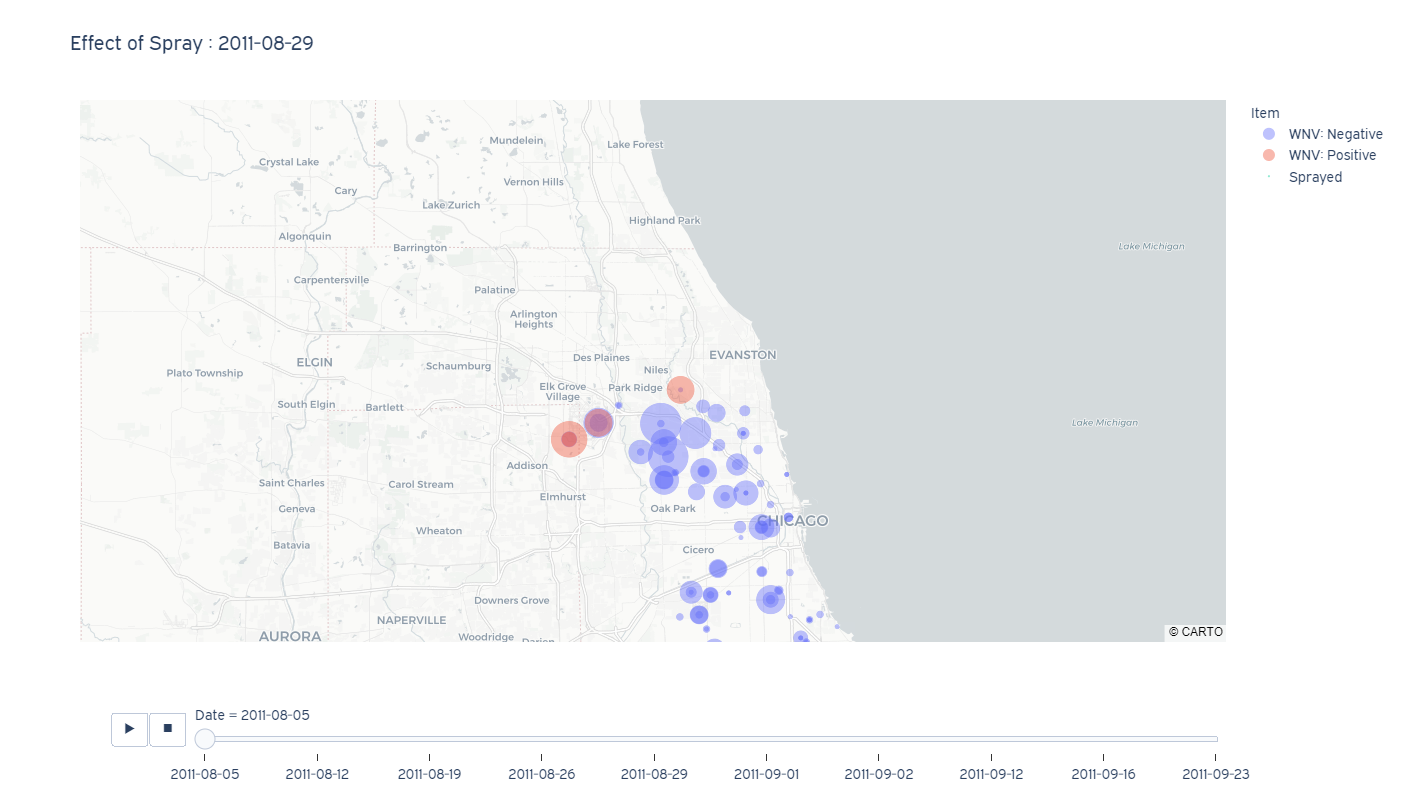

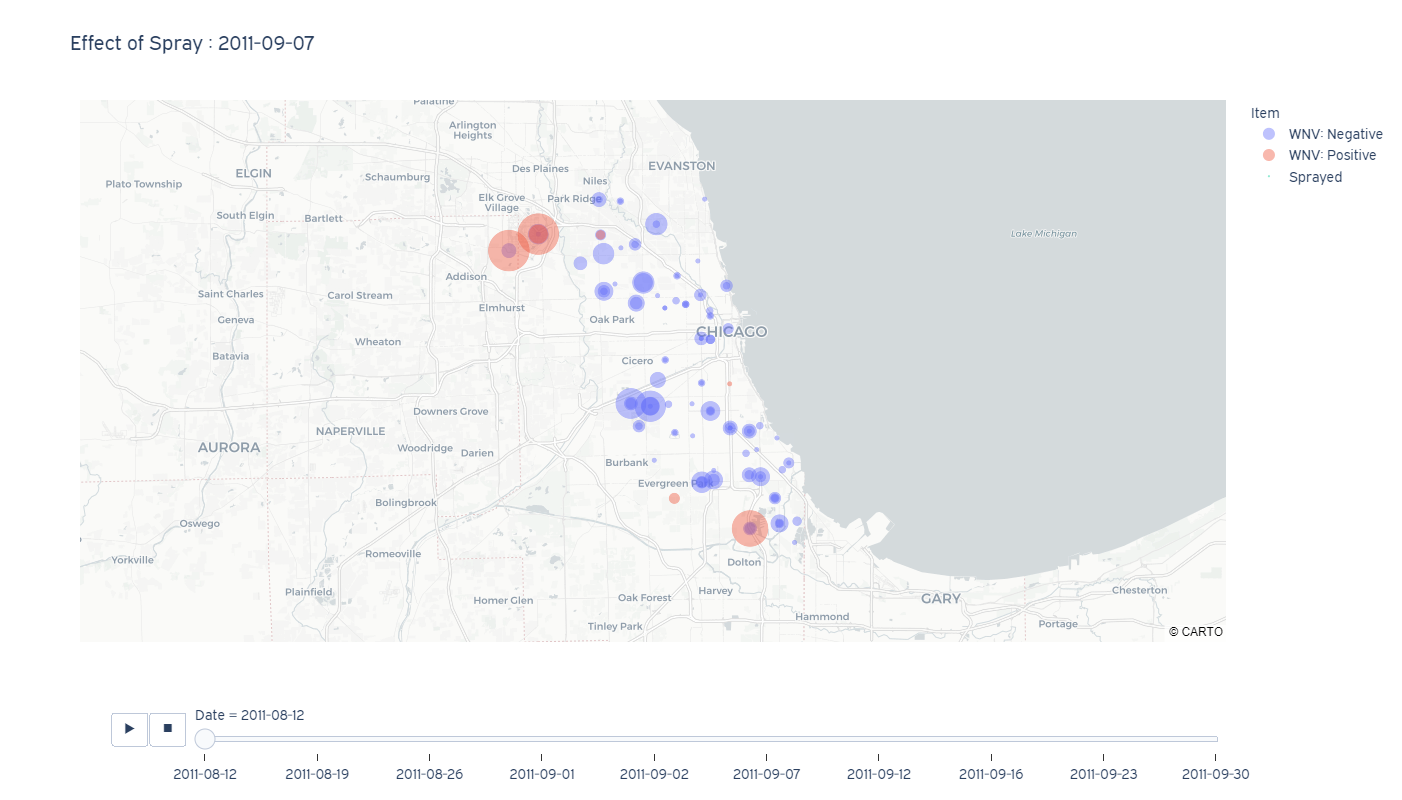

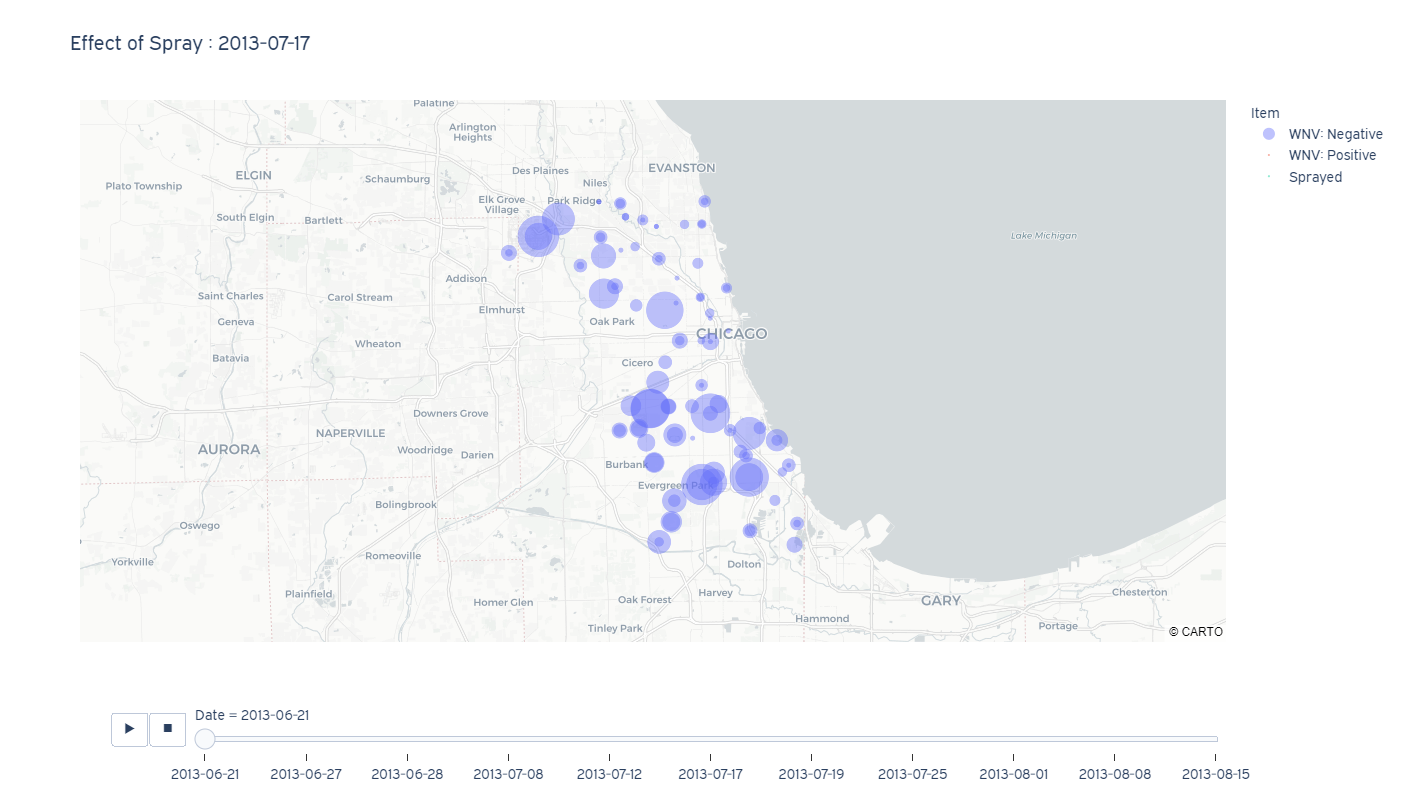

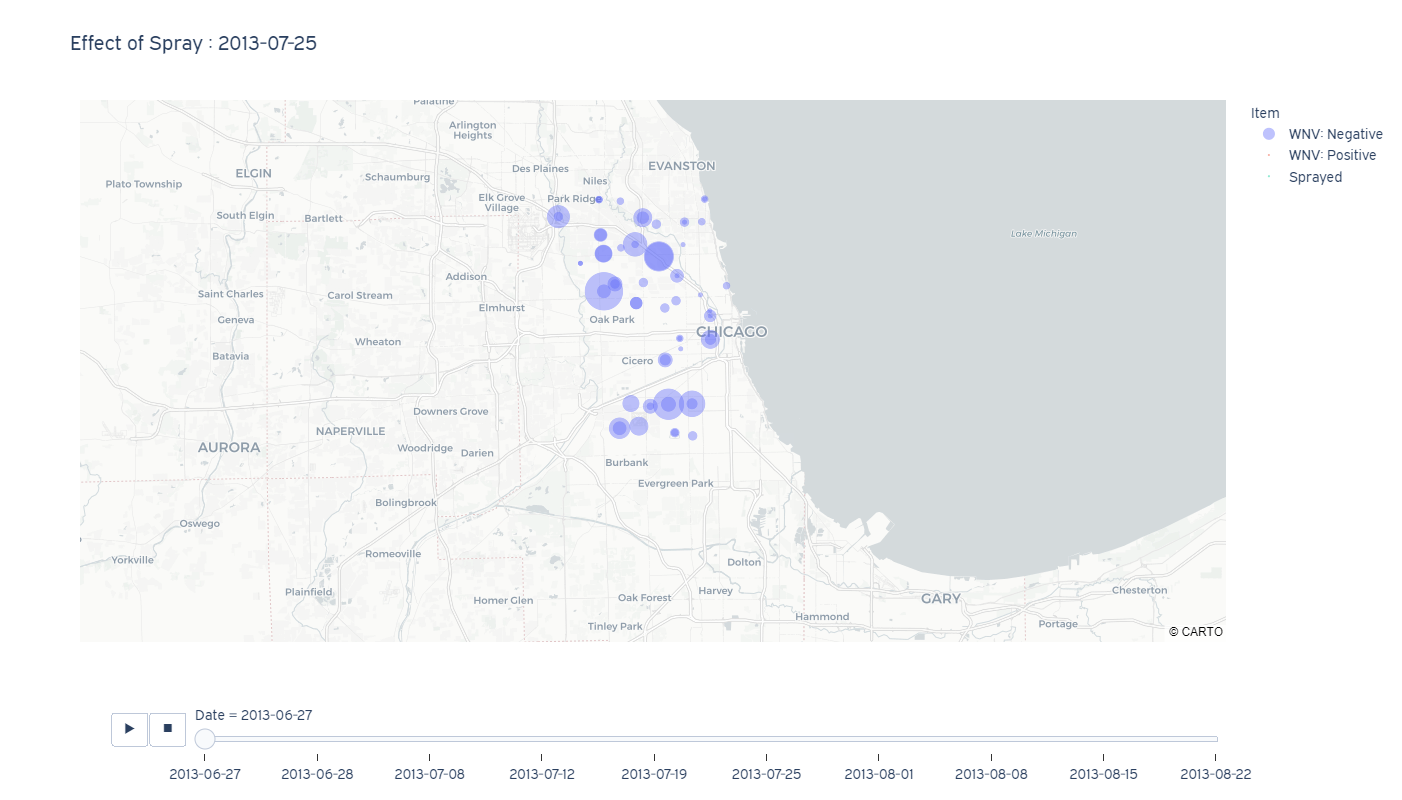

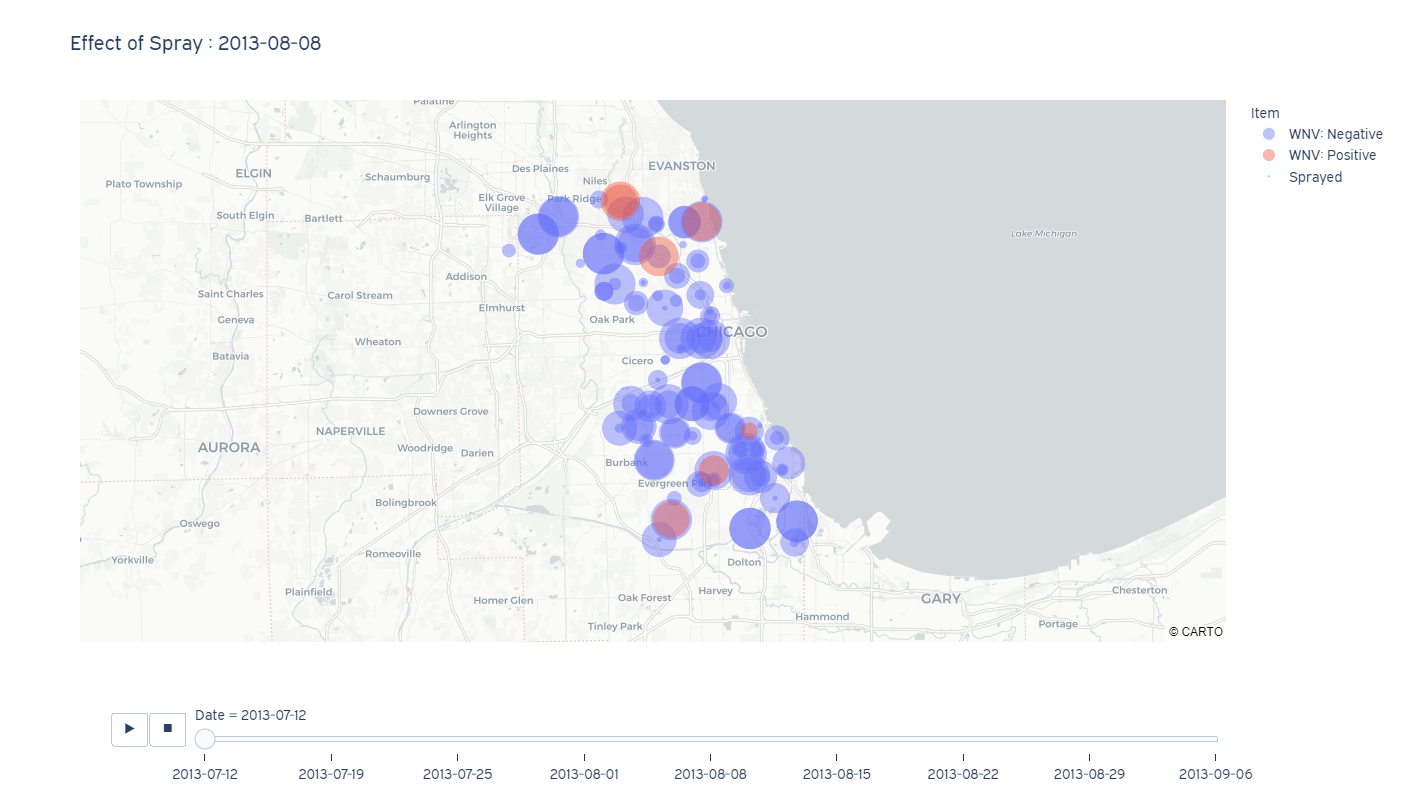

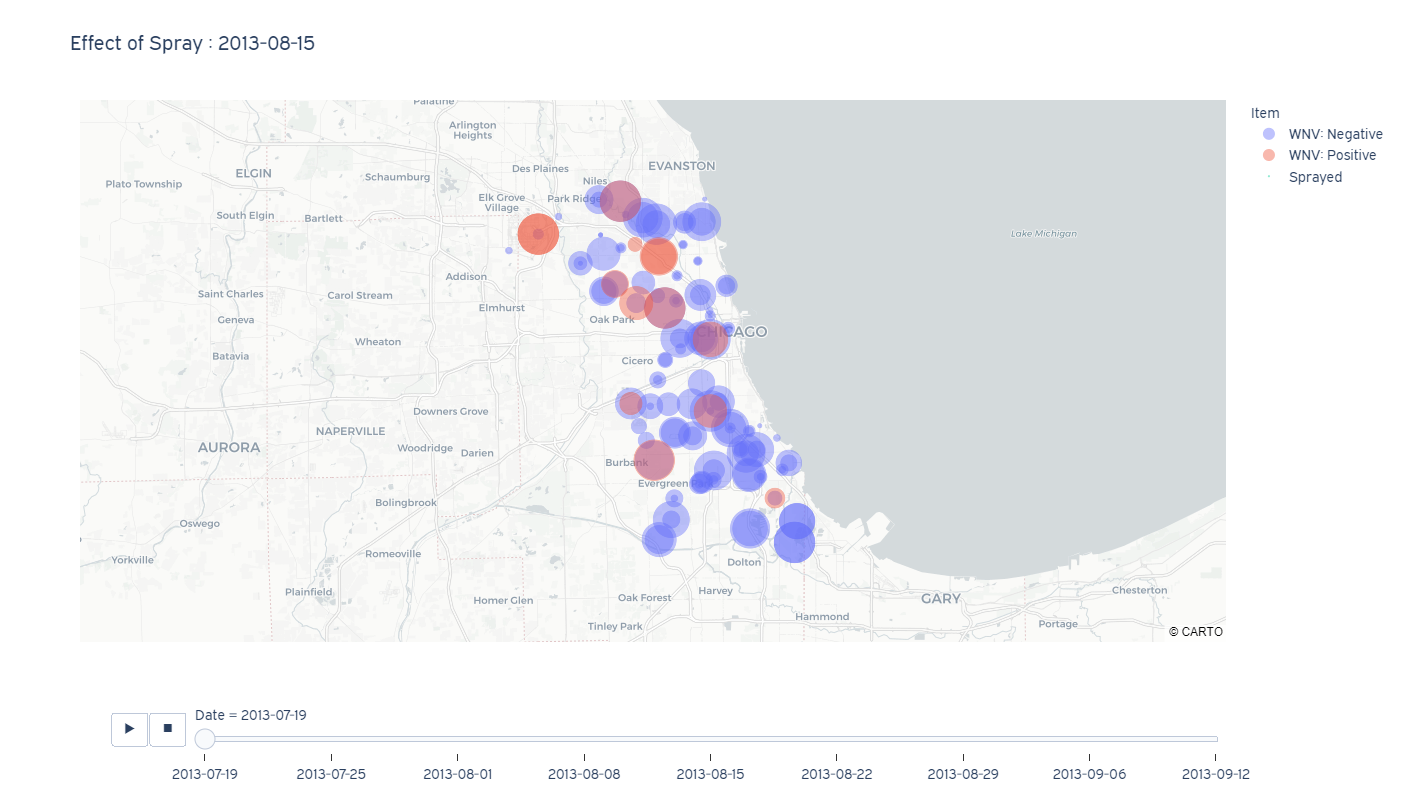

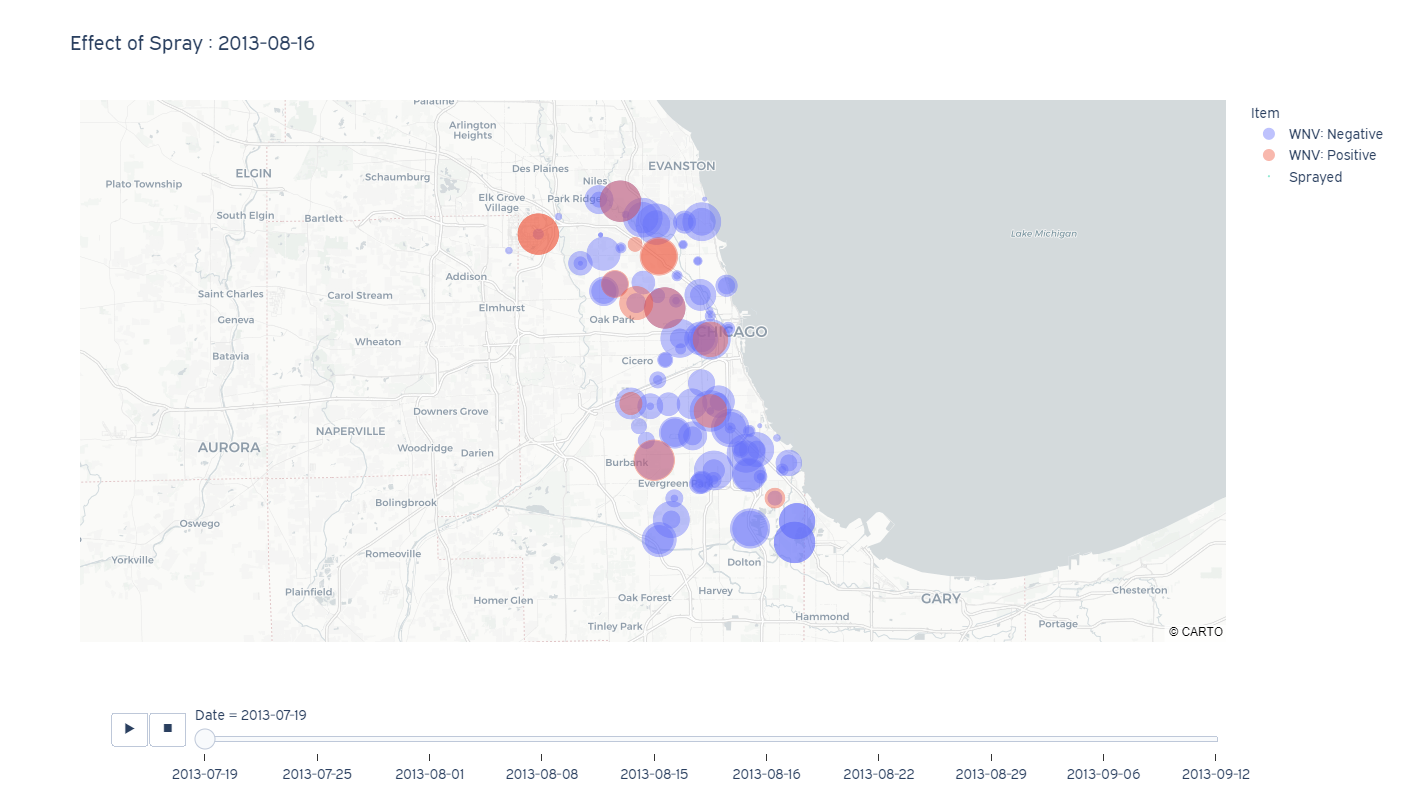

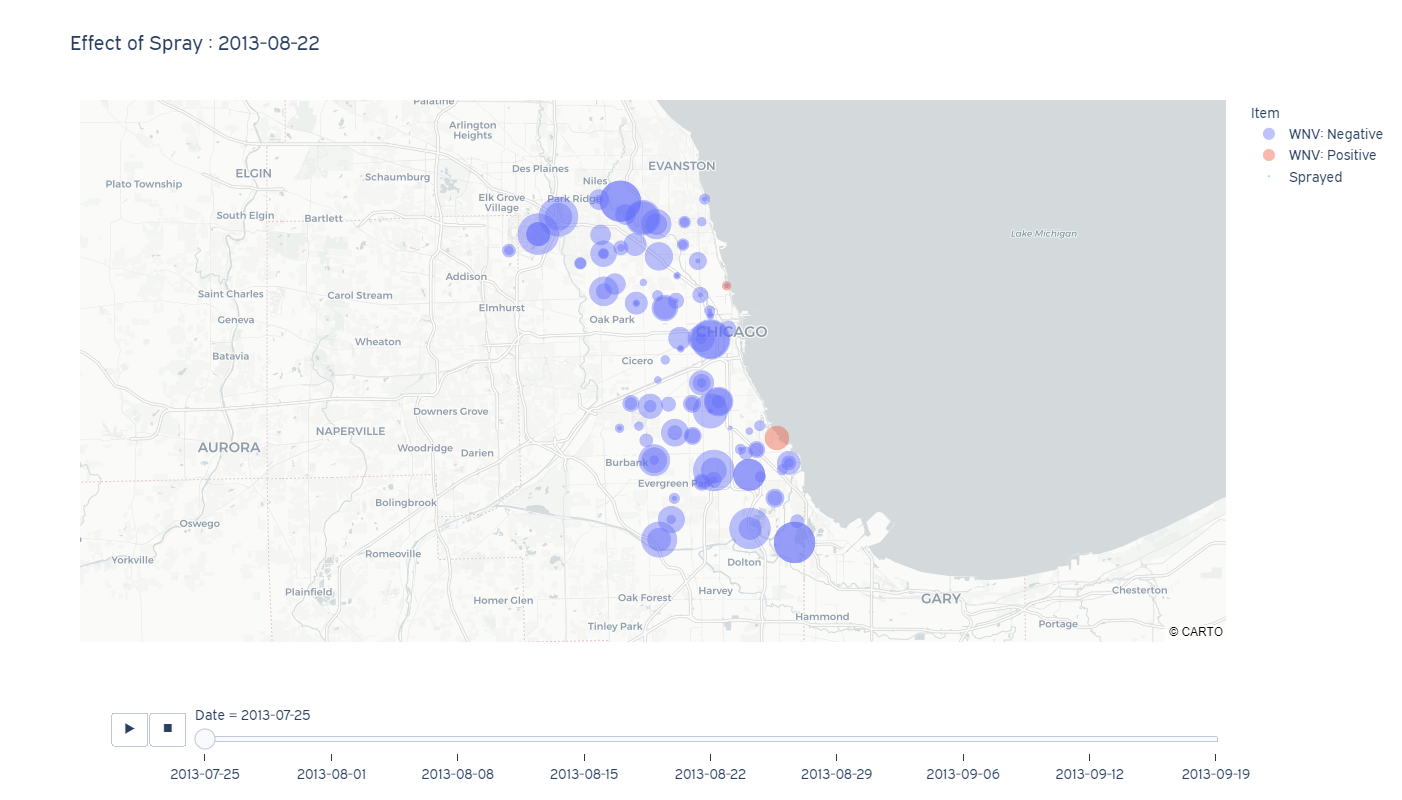

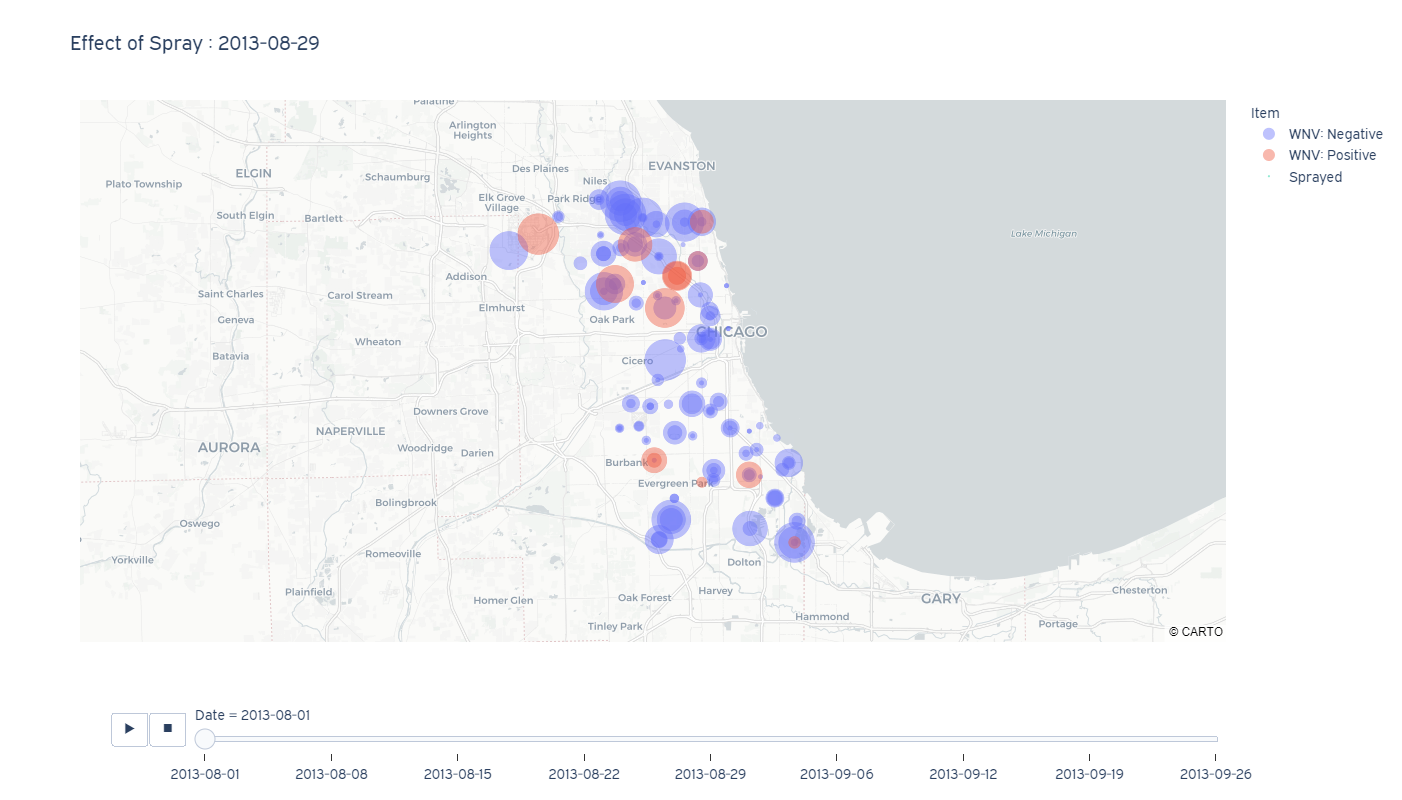

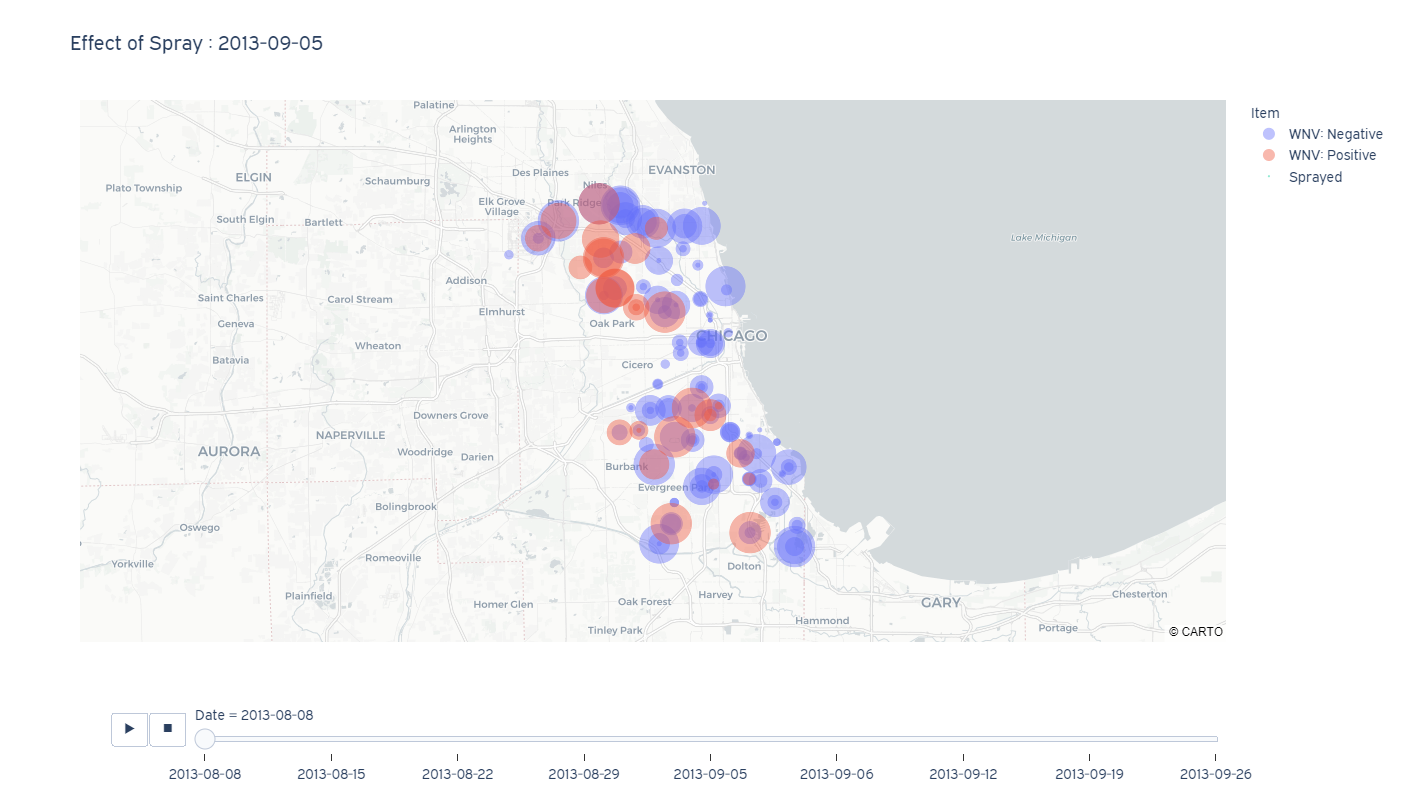

In [148]:
for spray_date in spray["Date"].unique():
    # Extract the train and spray data relevant to each spray.
    _train = train[(train["Date"].between(spray_date-delta, spray_date+delta))]
    _spray = spray[spray["Date"] == spray_date]
    
    # Create new columns for plotting.
    _train["Item"] = _train["WnvPresent"].map(lambda x: ["WNV: Negative", "WNV: Positive"][x])
    _train["Size"] = _train["NumMosquitos"]
    
    _spray["Item"] = "Sprayed"
    _spray["Size"] = 5
    
    # Concatenate the train and spray sub-data.
    train_spray = pd.concat([_train, _spray])
    
    # Append a dummy DataFrame to include all items on each date.
    dummy = []

    for date in train_spray["Date"].unique():
        dummy.append([date, "WNV: Negative", 0])
        dummy.append([date, "WNV: Positive", 0])
        dummy.append([date, "Sprayed", 0])

    train_spray = pd.concat([train_spray, pd.DataFrame(dummy, columns=["Date", "Item", "Size"])])
    
    # Sort the train-spray sub-data by `Date`.
    train_spray.sort_values("Date", ascending=True, inplace=True)
    
    # Convert the `Date` column to a string type for plotting.
    train_spray["Date"] = train_spray["Date"].astype(str) 
    
    # Plot a scatter mapbox.
    fg = xp.scatter_mapbox(train_spray, 
                           lat="Latitude", 
                           lon="Longitude", 
                           color="Item",
                           size="Size",
                           animation_frame="Date",
                           size_max=30,
                           center={"lat": middle(train_spray["Latitude"]),
                                   "lon": middle(train_spray["Longitude"])},
                           mapbox_style="carto-positron",
                           zoom=9, 
                           title=f"Effect of Spray : {np.datetime64(spray_date, 'D')}")
    fg.prettify()
    fg.update_layout(width=800, 
                     height=800)
    fg.show()